<a href="https://colab.research.google.com/github/zahid147/Datathon-TEMP/blob/main/KUET_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [3]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
ss = pd.read_csv("/content/sample_submission.csv")

In [ ]:
train.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN,0.850000
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,NaN,NaN,NaN,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),NaN,Machine Learning Leadership\nCross-Functional ...,NaN,0.750000
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,NaN,NaN,NaN,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,NaN,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,NaN,NaN,NaN,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,[None],[None],"['February 15, 2021']",Senior iOS Engineer,Bachelor of Science (BSc) in Computer Science,At least 4 years,NaN,iOS Lifecycle\nRequirement Analysis\nNative Fr...,iOS\niOS App Developer\niOS Application Develo...,0.650000


In [ ]:
test.head()

,ID,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,...,certification_skills,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required
0,1,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],...,NaN,NaN,NaN,NaN,Executive/ Sr. Executive -IT,Bachelor of Science (BSc) in Computer Science ...,3 to 5 years,Age at most 40 years,Hardware & Software Installation\nSystem Monit...,NaN
1,2,NaN,Graduating Ph.D. candidate with a research foc...,"['Air Force', 'ANSYS', 'approach', 'C', 'CAD',...","['Arizona State University', 'Arizona State Un...","['Doctor of Philosophy', 'Master of Science']","['Dec 2016', 'December 2013']","['3.9/4.0', '4.0/4.0']","['GPA', 'GPA']","['Mechanical Engineering', 'Mechanical Enginee...",...,NaN,NaN,NaN,NaN,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,NaN,Technical Support\nTroubleshooting\nCollaborat...,NaN
2,3,NaN,"A Fresher Seeking Roles In Machine Learning, B...","['Predictive Modelling', 'Statistical Solution...",['GODAVARI INSTITUTE OF ENGINEERING AND TECHNO...,['B.Tech (Mechanical)'],['2018'],['N/A'],['N/A'],['Mechanical'],...,NaN,NaN,NaN,NaN,Project Coordinator (Civil),•Bachelor of Business Administration (BBA) in ...,5 to 10 years,Age 30 to 40 years,Project Design\nData Analysis\nACCORD/Alliance...,Auto CAD 2D 3D\nCivil 3D\nCivil Construction\n...
3,4,NaN,I am a software engineer who has worked on sev...,"['Software Engineer/Developer', 'Software Deve...","['DVR College of Engineering & Technology', 'C...","['B.Tech', 'Post Graduation']","['2017', '2019']","['N/A', 'N/A']","['N/A', 'N/A']","['Electronics & Computers', 'Software Developm...",...,NaN,NaN,NaN,NaN,Head of Internal Control & Compliance (ICC) - ...,"Masters, Master of Business Administration (MB...",At least 15 years,Age at most 52 years,15+ Years Banking Experience\nAudit/Inspection...,AUDIT AND INSPECTION\nBanking\nInternal Audit
4,5,NaN,NaN,"['Data Analysis', 'Data Analytics', 'Linear Re...","['HiiT College, Goa']",['B.Tech'],['2019'],['N/A'],['N/A'],['Electrical and Electronics'],...,NaN,NaN,NaN,NaN,Executive/ Sr. Executive -IT,Bachelor of Science (BSc) in Computer Science ...,3 to 5 years,Age at most 40 years,Hardware & Software Installation\nSystem Monit...,NaN


In [ ]:
ss.head()

,ID,matched_score
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5


In [6]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)
print("Sample shape: ", ss.shape)

Training set shape:  (7635, 35)
Test set shape:  (1909, 35)
Sample shape:  (1909, 2)


In [ ]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              633 non-null    object 
 1   career_objective                     3794 non-null   object 
 2   skills                               7592 non-null   object 
 3   educational_institution_name         7574 non-null   object 
 4   degree_names                         7574 non-null   object 
 5   passing_years                        7574 non-null   object 
 6   educational_results                  7574 non-null   object 
 7   result_types                         7574 non-null   object 
 8   major_field_of_studies               7574 non-null   object 
 9   professional_company_names           7568 non-null   object 
 10  company_urls                         7568 non-null   object 
 11  start_dates                   

In [ ]:
train.isnull().sum().sort_values(ascending = False)

,0
proficiency_levels,7066
languages,7066
address,7002
expiry_dates,6048
issue_dates,6048
online_links,6048
certification_skills,6048
certification_providers,6048
extra_curricular_organization_names,4903
role_positions,4903


In [ ]:
test.isnull().sum().sort_values(ascending = False)

,0
proficiency_levels,1778
languages,1778
address,1758
expiry_dates,1488
issue_dates,1488
online_links,1488
certification_skills,1488
certification_providers,1488
role_positions,1215
extra_curricular_organization_links,1215


<Axes: >

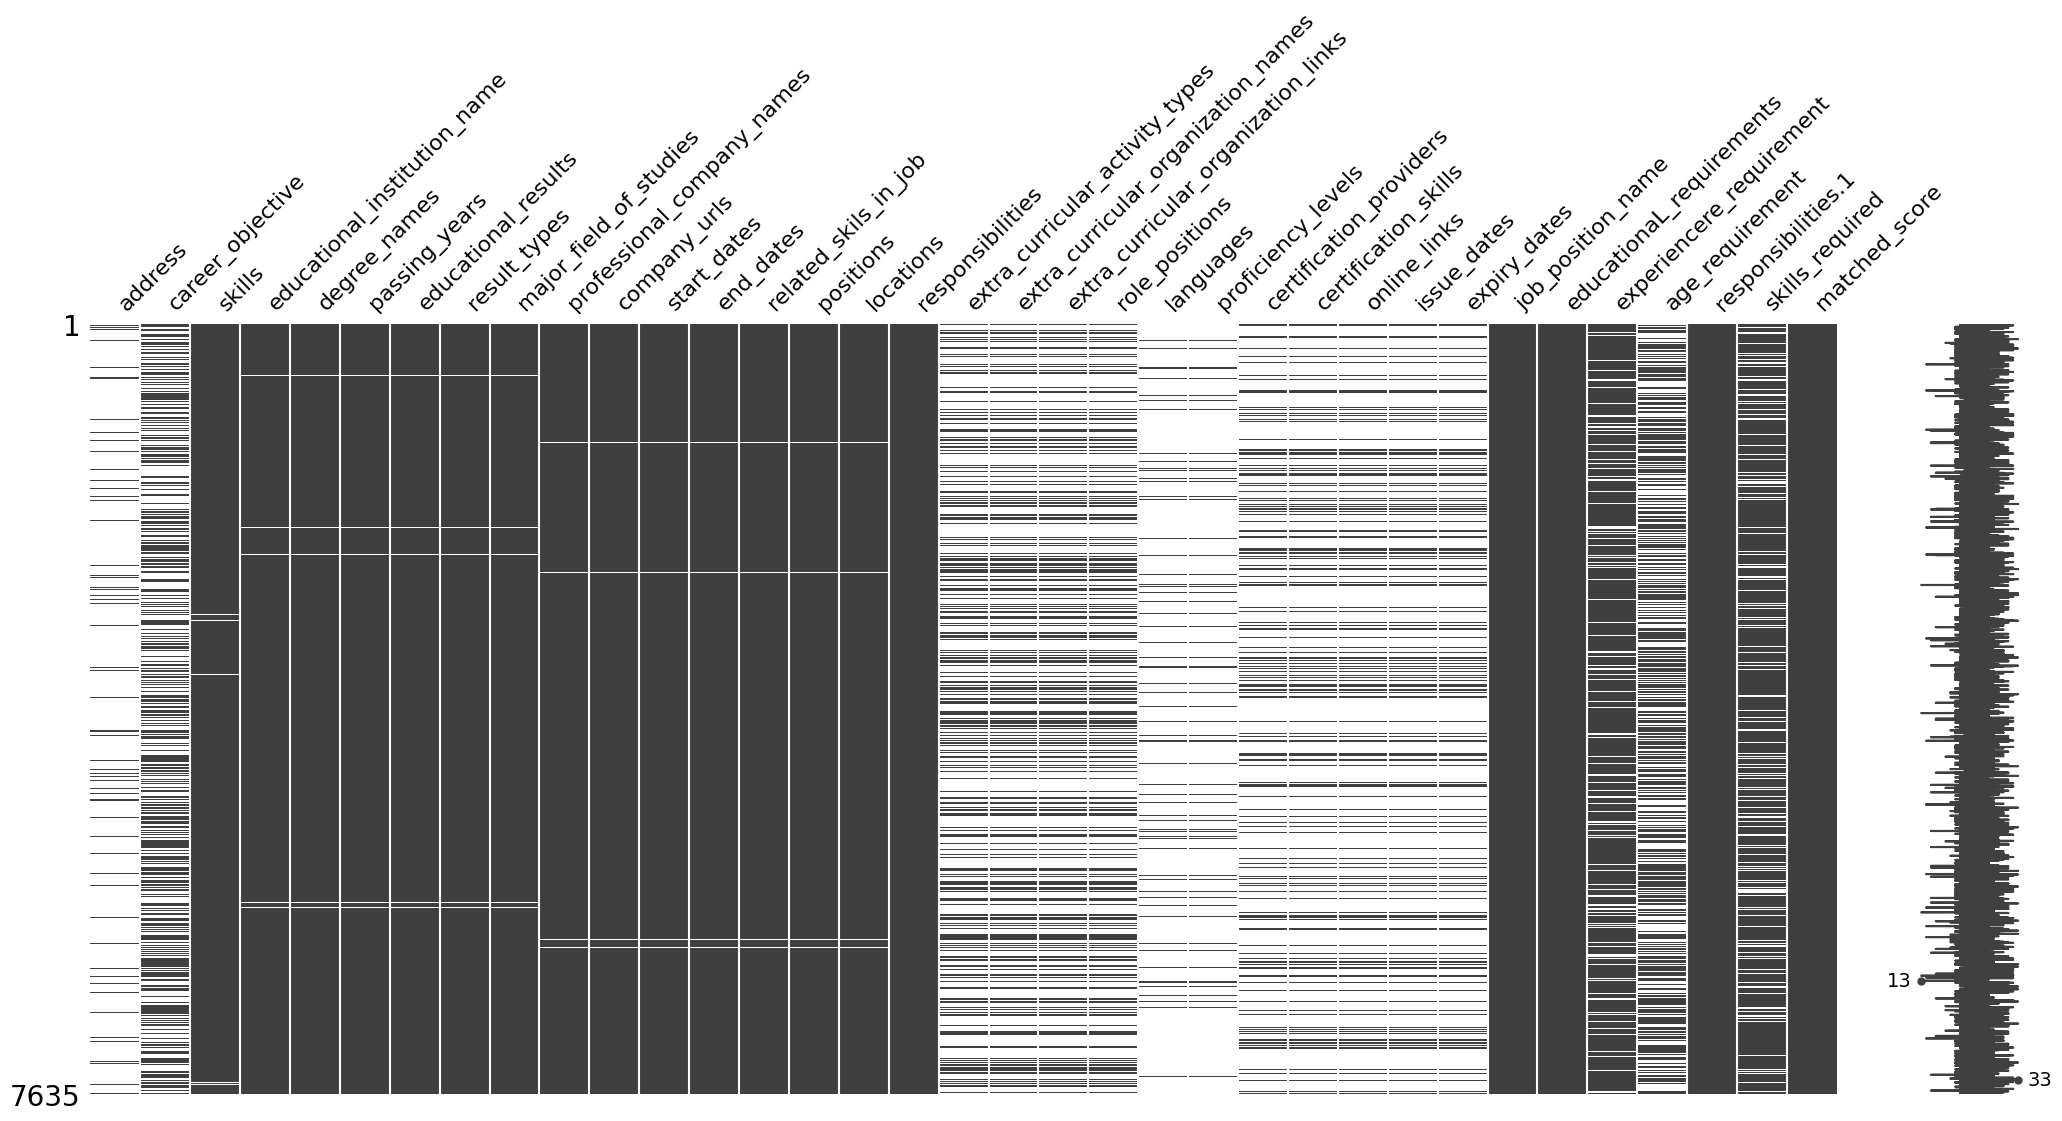

In [ ]:
missingno.matrix(train)

<Axes: >

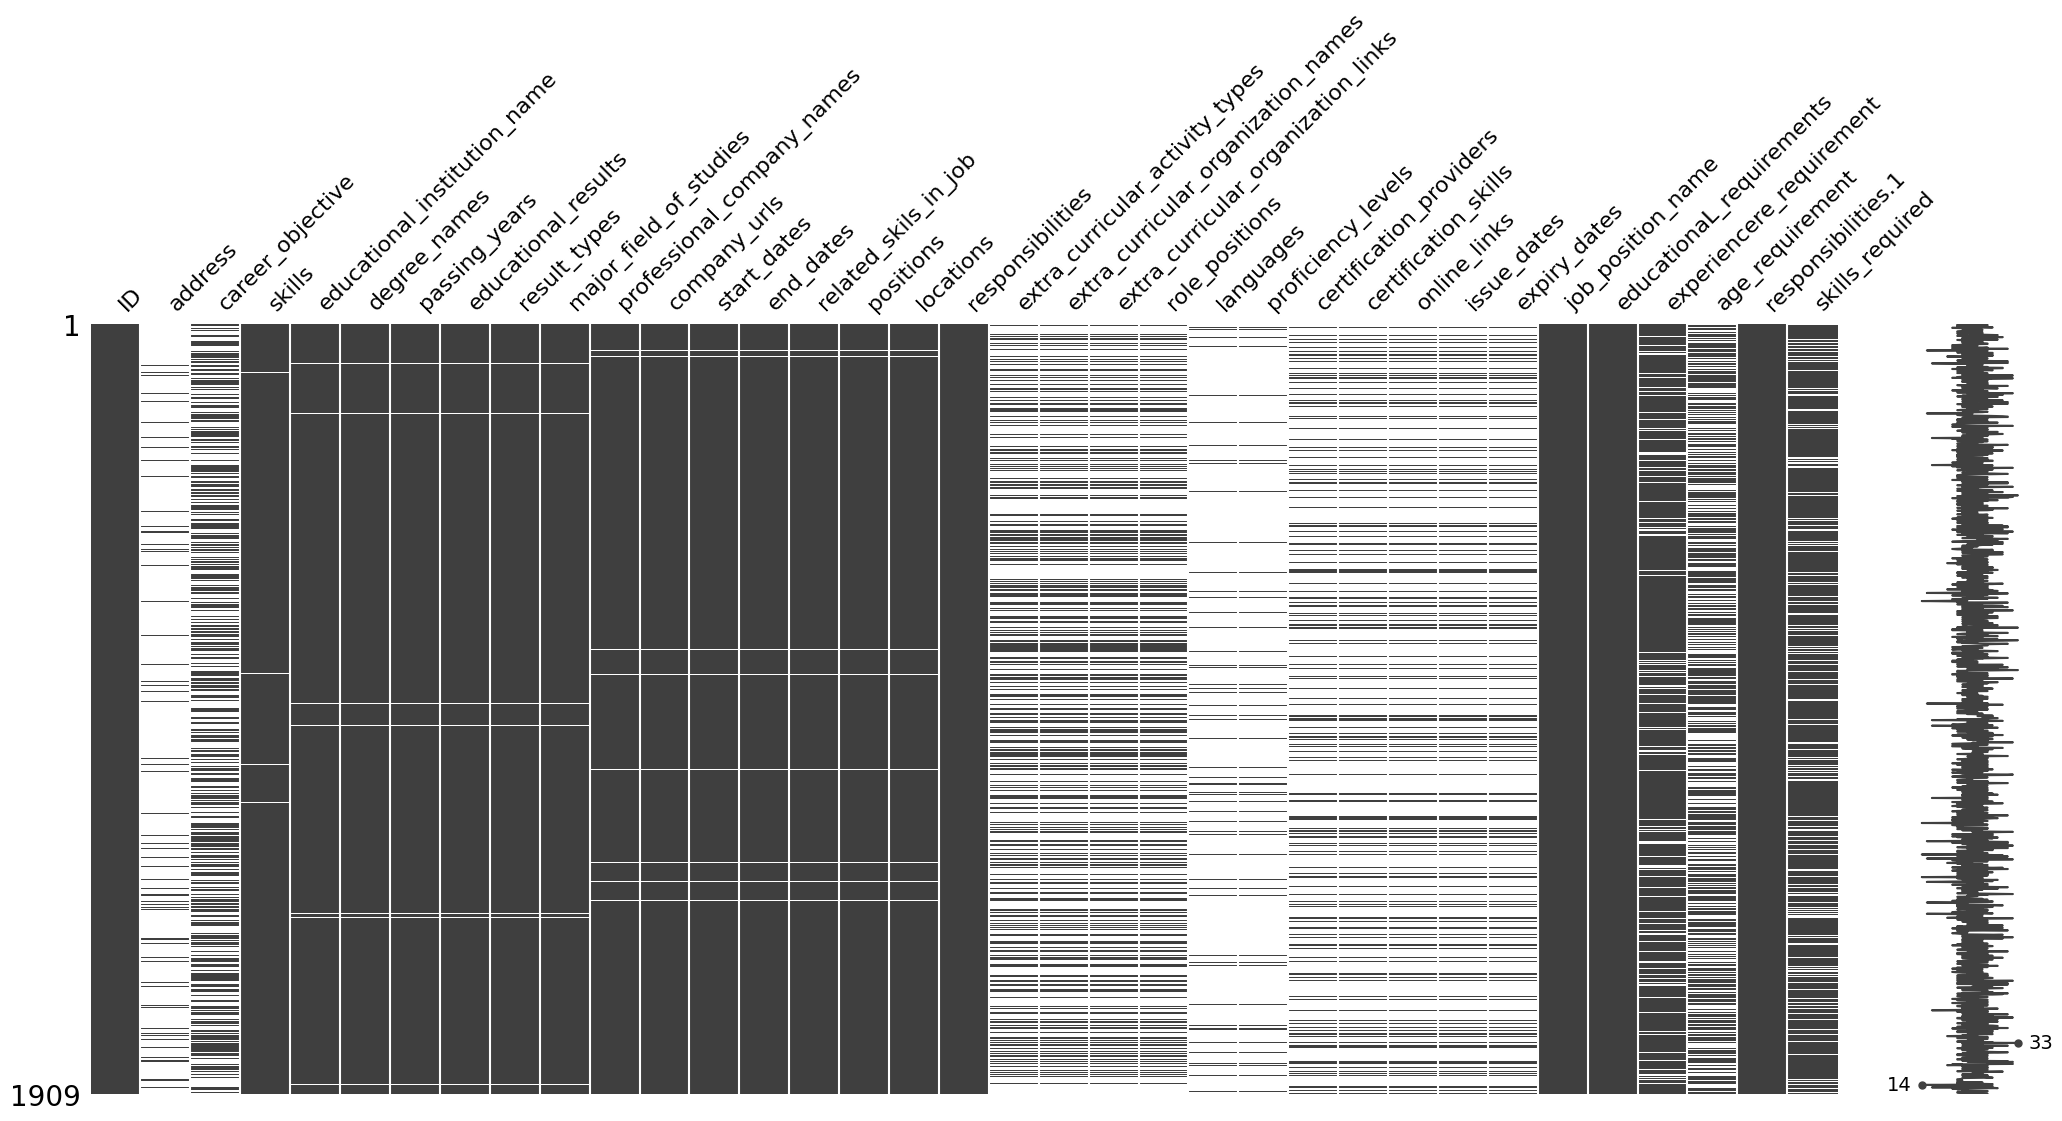

In [ ]:
missingno.matrix(test)

In [ ]:
train.describe()

,matched_score
count,7635.000000
mean,0.660667
std,0.167405
min,0.000000
25%,0.576667
50%,0.683333
75%,0.793333
max,0.970000


In [ ]:
test.describe()

,ID
count,1909.000000
mean,955.000000
std,551.225151
min,1.000000
25%,478.000000
50%,955.000000
75%,1432.000000
max,1909.000000
